In [1]:
#抓取資料
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
#整理資料成 DataFrame
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
# 分群不曉得答案, 別把 target放進去  df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#開始訓練
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
#分群時是不曉得答案，因此不能把y代入，直接帶入 x_train讓他分成3類
clu.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
# clu.labels_做出來的是演算法自己做出來的答案, 他運用每一筆資料的相似度分群, 把這個當作答案放進表格內
df["labels"]= clu.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [5]:
#分群之後的圓心, cluster_centers_是一個虛擬圓心, 0這一群(setosa)的每個 sepal length距離圓心的平均距離是5.06, 每個 sepal width 距離圓心的平均距離是 3.428  
clu.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [6]:
#算親疏程度, 用 Kmeans來分群, 我要從0~跑到5群，看哪一群比較好, 同時用silhouette score去看哪一種分得比較好
from sklearn.metrics import silhouette_score
plotx = []
ploty = []
for i in range(2, 6):
    clu = KMeans(n_clusters=i)
    clu.fit(iris["data"])
    s = silhouette_score(iris["data"], clu.labels_)
    #不要設定一個變數給append
    plotx.append(i)
    ploty.append(s)
print("k值:", plotx)
print("score:", ploty)

k值: [2, 3, 4, 5]
score: [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.49123997967644706]


In [7]:
#以上面的例子，我們要選分兩群， k=2 的值，因為 silhouette score =0.68 是數值最高，數值最高表示分群分越好

Text(0, 0.5, 'score')

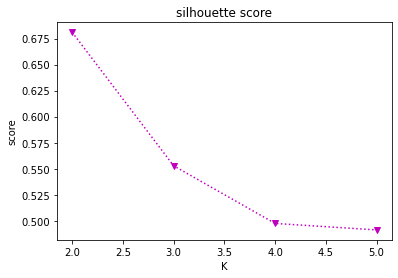

In [8]:
#畫圖, silhouette score說明, score =1分群最好, =-1時最差, 0表示重疊多 參考：https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline表示這個格子有多少圖就打印多少圖 jupyter專屬技能
%matplotlib inline
plt.plot(plotx, ploty, "mv:")
plt.title("silhouette score")
plt.xlabel("K")
plt.ylabel("score")

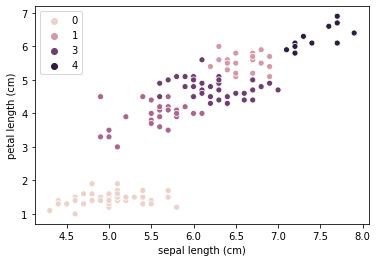

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# scatter是散布圖, 畫圖時最多畫三維圖, 沒有四維, 通常 scatter用兩軸來處理(2D圖), 但鳶尾花有四個軸:sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
# 目前先挑選出兩個特徵出來處理, 後續可以處理:如果有10個特徵時, 要把十個特徵縮減成2個特徵, 這2個特徵濃縮了10個特徵在內 hue=clu.labels_
xs, ys = df["sepal length (cm)"], df["petal length (cm)"]
sns.scatterplot(xs, ys, clu.labels_)

# summary
+ <font size=4> 由上面可知, silhouette score 離散程度, 來看, 分成2群是最快可以把iris分開的方式, 其中的 setosa可以用 sepal length 和 petal length 來快速分開</font>
+ <font size=4> 但實際上, 按照嘗試推理, iris應該不只兩群, 因此退而求其次分成3群是比較合理的</font>